In [8]:
import heapq

def a_star(graph, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_cost = {node: float('inf') for node in graph}
    g_cost[start] = 0

    parent = {}
    closed = set()

    while open_list:
        f, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1], g_cost[goal]

        closed.add(current)

        for neighbor, cost in graph[current]:
            if neighbor in closed:
                continue

            tentative_g = g_cost[current] + cost

            if tentative_g < g_cost[neighbor]:
                parent[neighbor] = current
                g_cost[neighbor] = tentative_g
                f_value = tentative_g + heuristic[neighbor]
                heapq.heappush(open_list, (f_value, neighbor))

    return None, None

In [9]:
# ✅ Example 1 — Simple Graph (Optimal Case)

graph1 = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 2)],
    'B': [('C', 1)],
    'C': [('G', 3)],
    'G': []
}

heuristic1 = {
    'S': 7,
    'A': 6,
    'B': 2,
    'C': 1,
    'G': 0
}

path1, cost = a_star(graph1, 'S', 'G', heuristic1)
print("Example 1 Path:", path1)
print("Cost:", cost)

Example 1 Path: ['S', 'B', 'C', 'G']
Cost: 8


# ✅ Example 2 — Same Graph Where Greedy Failed

In [ ]:
graph2 = {
    'S': [('A', 1), ('B', 5)],
    'A': [('G', 100)],
    'B': [('G', 5)],
    'G': []
}

heuristic2 = {
    'S': 7,
    'A': 1,
    'B': 6,
    'G': 0
}

path2, cost = a_star(graph2, 'S', 'G', heuristic2)
print("Example 2 Path:", path2)
print("Cost:", cost)

Example 2 Path: ['S', 'B', 'G']
Cost: 10


# ✅ Example 3 — Tree Structure

In [11]:
graph3 = {
    'S': [('A', 2), ('B', 3)],
    'A': [('C', 4)],
    'B': [('G', 2)],
    'C': [],
    'G': []
}

heuristic3 = {
    'S': 4,
    'A': 2,
    'B': 1,
    'C': 3,
    'G': 0
}

path3, cost = a_star(graph3, 'S', 'G', heuristic3)
print("Example 3 Path:", path3)
print("Cost:", cost)

Example 3 Path: ['S', 'B', 'G']
Cost: 5


# ✅ Example 4 — Grid Type Example

In [12]:
graph4 = {
    'A': [('B',1), ('C',3)],
    'B': [('D',1)],
    'C': [('D',1)],
    'D': [('G',2)],
    'G': []
}

heuristic4 = {
    'A': 4,
    'B': 2,
    'C': 2,
    'D': 1,
    'G': 0
}

path4, cost = a_star(graph4, 'A', 'G', heuristic4)
print("Example 4 Path:", path4)
print("Cost:", cost)

Example 4 Path: ['A', 'B', 'D', 'G']
Cost: 4


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_astar(graph, path, title="A* Visualization"):
    G = nx.DiGraph()

    # Add edges
    for node in graph:
        for neighbor, cost in graph[node]:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(6,5))

    # Draw all nodes
    nx.draw(G, pos, with_labels=True, node_size=2000)

    # Highlight optimal path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3)

    # Show edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(title)
    plt.show()

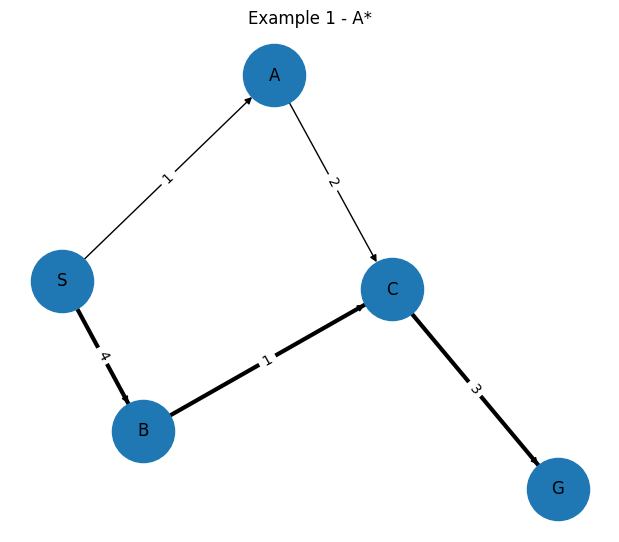

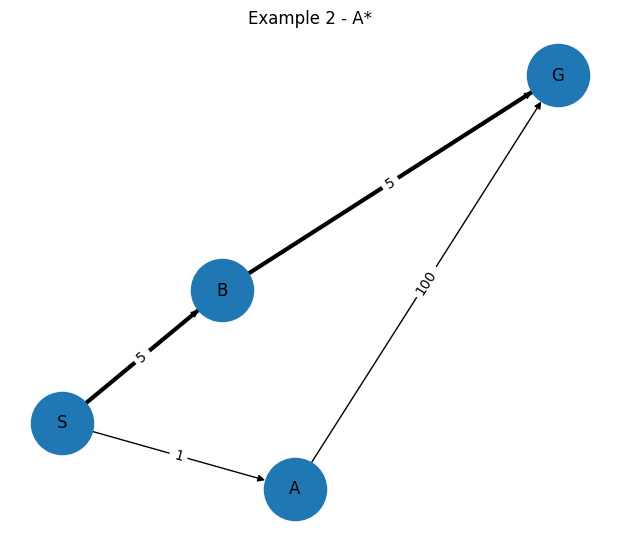

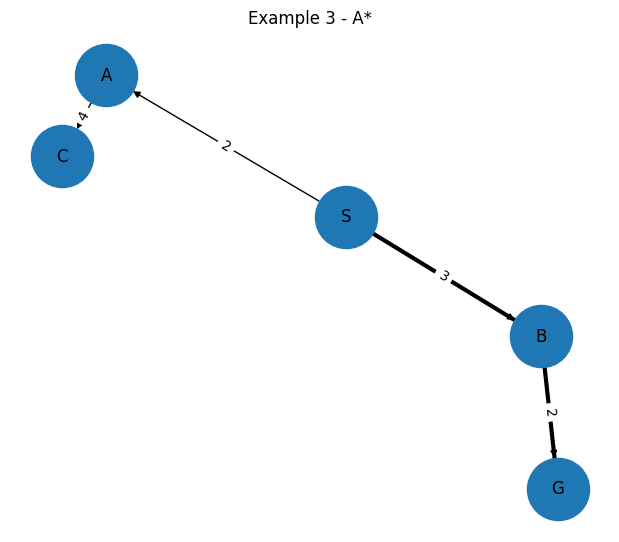

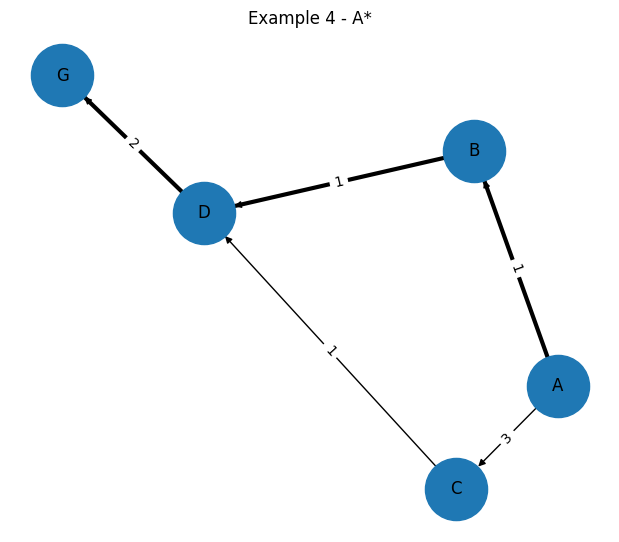

In [14]:
visualize_astar(graph1, path1, "Example 1 - A*")
visualize_astar(graph2, path2, "Example 2 - A*")
visualize_astar(graph3, path3, "Example 3 - A*")
visualize_astar(graph4, path4, "Example 4 - A*")